# Predictive Modeling (Lung Cancer)

In [1]:
import pandas as pd

# Load the dataset
file_path = "survey lung cancer.csv"
df = pd.read_csv(file_path)

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

(None,
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
 0      M   69        1               2        2              1   
 1      M   74        2               1        1              1   
 2      F   59        1               1        1              2   
 3      M   63        2               2        2              1   
 4      F   63        1               2        1              1   
 
    CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
 0                1         2         1         2                  2         2   
 1                2         2         2         1                  1         1   
 2                1         2         1         2                  1         2   
 3                1         1         1         1                  2         1   
 4                1         1         1         2                  1         2   
 
    SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
 0                    

# Pre-processing

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
df_encoded = df.copy()
le_gender = LabelEncoder()
le_cancer = LabelEncoder()
df_encoded["GENDER"] = le_gender.fit_transform(df_encoded["GENDER"])
df_encoded["LUNG_CANCER"] = le_cancer.fit_transform(df_encoded["LUNG_CANCER"])

# Define features and target
X = df_encoded.drop("LUNG_CANCER", axis=1)
y = df_encoded["LUNG_CANCER"]

X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


# Random Forest Classifier

In [3]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [4]:
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=le_cancer.classes_, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

report_df = pd.DataFrame(report).transpose()

conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=[f"Actual_{cls}" for cls in le_cancer.classes_], 
                              columns=[f"Predicted_{cls}" for cls in le_cancer.classes_])


# Result

In [5]:
report_df

,precision,recall,f1-score,support
NO,0.500000,0.500000,0.500000,2.000000
YES,0.983333,0.983333,0.983333,60.000000
accuracy,0.967742,0.967742,0.967742,0.967742
macro avg,0.741667,0.741667,0.741667,62.000000
weighted avg,0.967742,0.967742,0.967742,62.000000


# Confusion Matrix

In [6]:
conf_matrix_df

,Predicted_NO,Predicted_YES
Actual_NO,1,1
Actual_YES,1,59


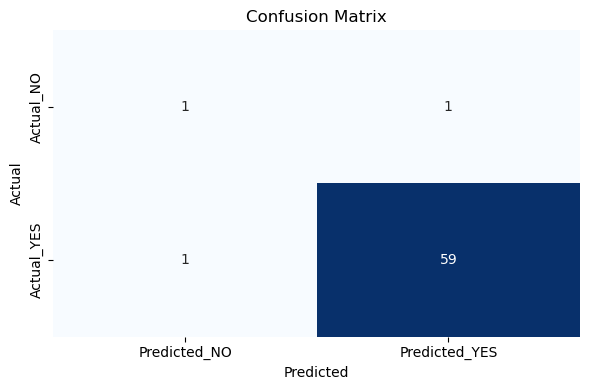

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()


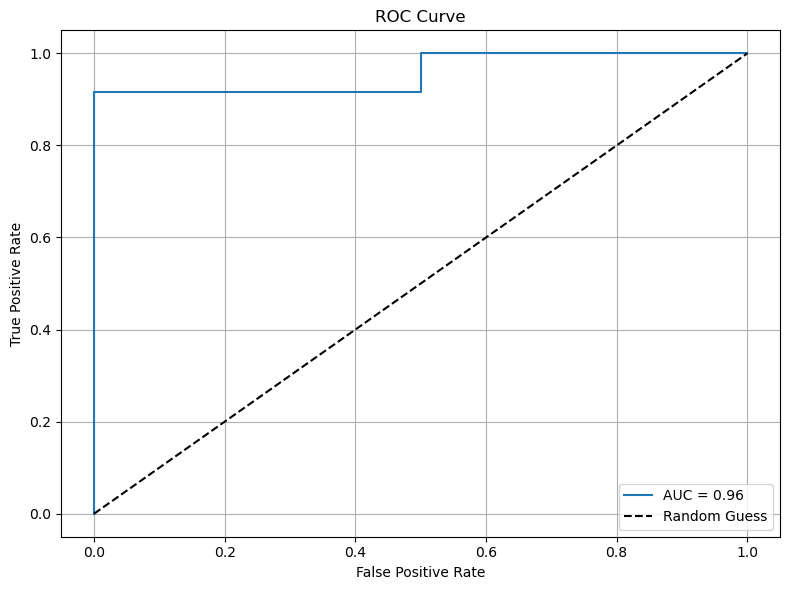

In [8]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_scores = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))

# ROC Curve
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)


plt.tight_layout()
plt.show()


# Ensemble/Voting Classifier

In [9]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


clf1 = LogisticRegression(max_iter=1000, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = SVC(probability=True, random_state=42)

# VotingClassifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)],
    voting='soft'
)

# Train Voting Classifier
voting_clf.fit(X_train, y_train)



VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [10]:
y_pred_voting = voting_clf.predict(X_test)
report_voting = classification_report(y_test, y_pred_voting, target_names=le_cancer.classes_, output_dict=True)
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

report_voting_df = pd.DataFrame(report_voting).transpose()

conf_matrix_voting_df = pd.DataFrame(conf_matrix_voting, 
                              index=[f"Actual_{cls}" for cls in le_cancer.classes_], 
                              columns=[f"Predicted_{cls}" for cls in le_cancer.classes_])

# Results

In [11]:
report_voting_df

,precision,recall,f1-score,support
NO,1.000000,0.500000,0.666667,2.000000
YES,0.983607,1.000000,0.991736,60.000000
accuracy,0.983871,0.983871,0.983871,0.983871
macro avg,0.991803,0.750000,0.829201,62.000000
weighted avg,0.984135,0.983871,0.981249,62.000000


# Confusion Matrix

In [12]:
conf_matrix_voting_df

,Predicted_NO,Predicted_YES
Actual_NO,1,1
Actual_YES,0,60


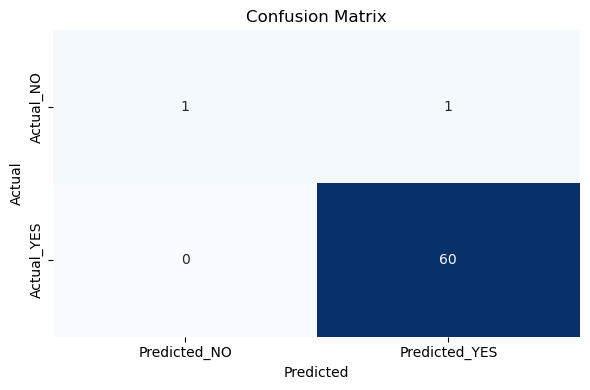

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_voting_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

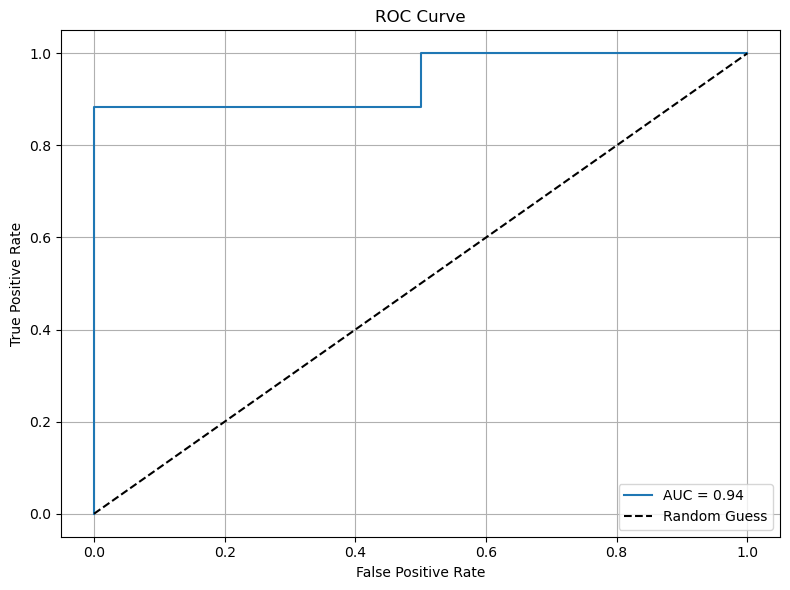

In [14]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_scores = voting_clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))

# ROC Curve
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)


plt.tight_layout()
plt.show()